# The spelled-out intro to language modeling:building makemore
-----

## 목차 
1. [reading and exploring the dataset](#1.reading-and-exploring-the-dataset)
2. [exploring the bigrams in the dataset](#2.exploring-the-bigrams-in-the-dataset)


---

## 1.reading and exploring the dataset

In [1]:
# Data load

words = open("names.txt").read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
#단어 중 가장 짧은 단어의 길이
min(len(w) for w in words)

2

In [5]:
#단어 중 가장 긴 단어의 길이
max(len(w) for w in words)

15

In [6]:
# 단어에서 한 절자와 그 다음 절차를 출력
# bigram 그전 절자를 통해  다음 절자를 출력
# 가장 간단한 방법 통계적으로 한 철자에서 다음 철자가 나올 확률을 계산
b = {}
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"] ## start and end token을 추가하여 시작과 종료을 표시
    for  ch1, ch2 in zip(chs, chs[1:]):
            bigram = (ch1, ch2)
            b[bigram] = b.get(bigram, 0) + 1 

In [7]:
sorted(b.items(), key= lambda x: x[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [8]:
import torch

In [9]:
# 단어의 빈도를 나타낼 행렬을 생성
N = torch.zeros((27,27), dtype=torch.int32)

In [10]:
# 철자 매핑 테이블을 생성
# stoi charactor to index
# itor index to charactor

chars = sorted(list(set(''.join(words))))
stoi = {ch:i+1 for i, ch in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [11]:
# 단어에서 한 절자와 그 다음 절차를 출력
# bigram 그전 절자를 통해  다음 절자를 출력
# 가장 간단한 방법 통계적으로 한 철자에서 다음 철자가 나올 확률을 계산
for w in words:
    chs = ['.'] + list(w) + ['.']## start and end token을 추가하여 시작과 종룔을 표시
    for  ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

(-0.5, 26.5, 26.5, -0.5)

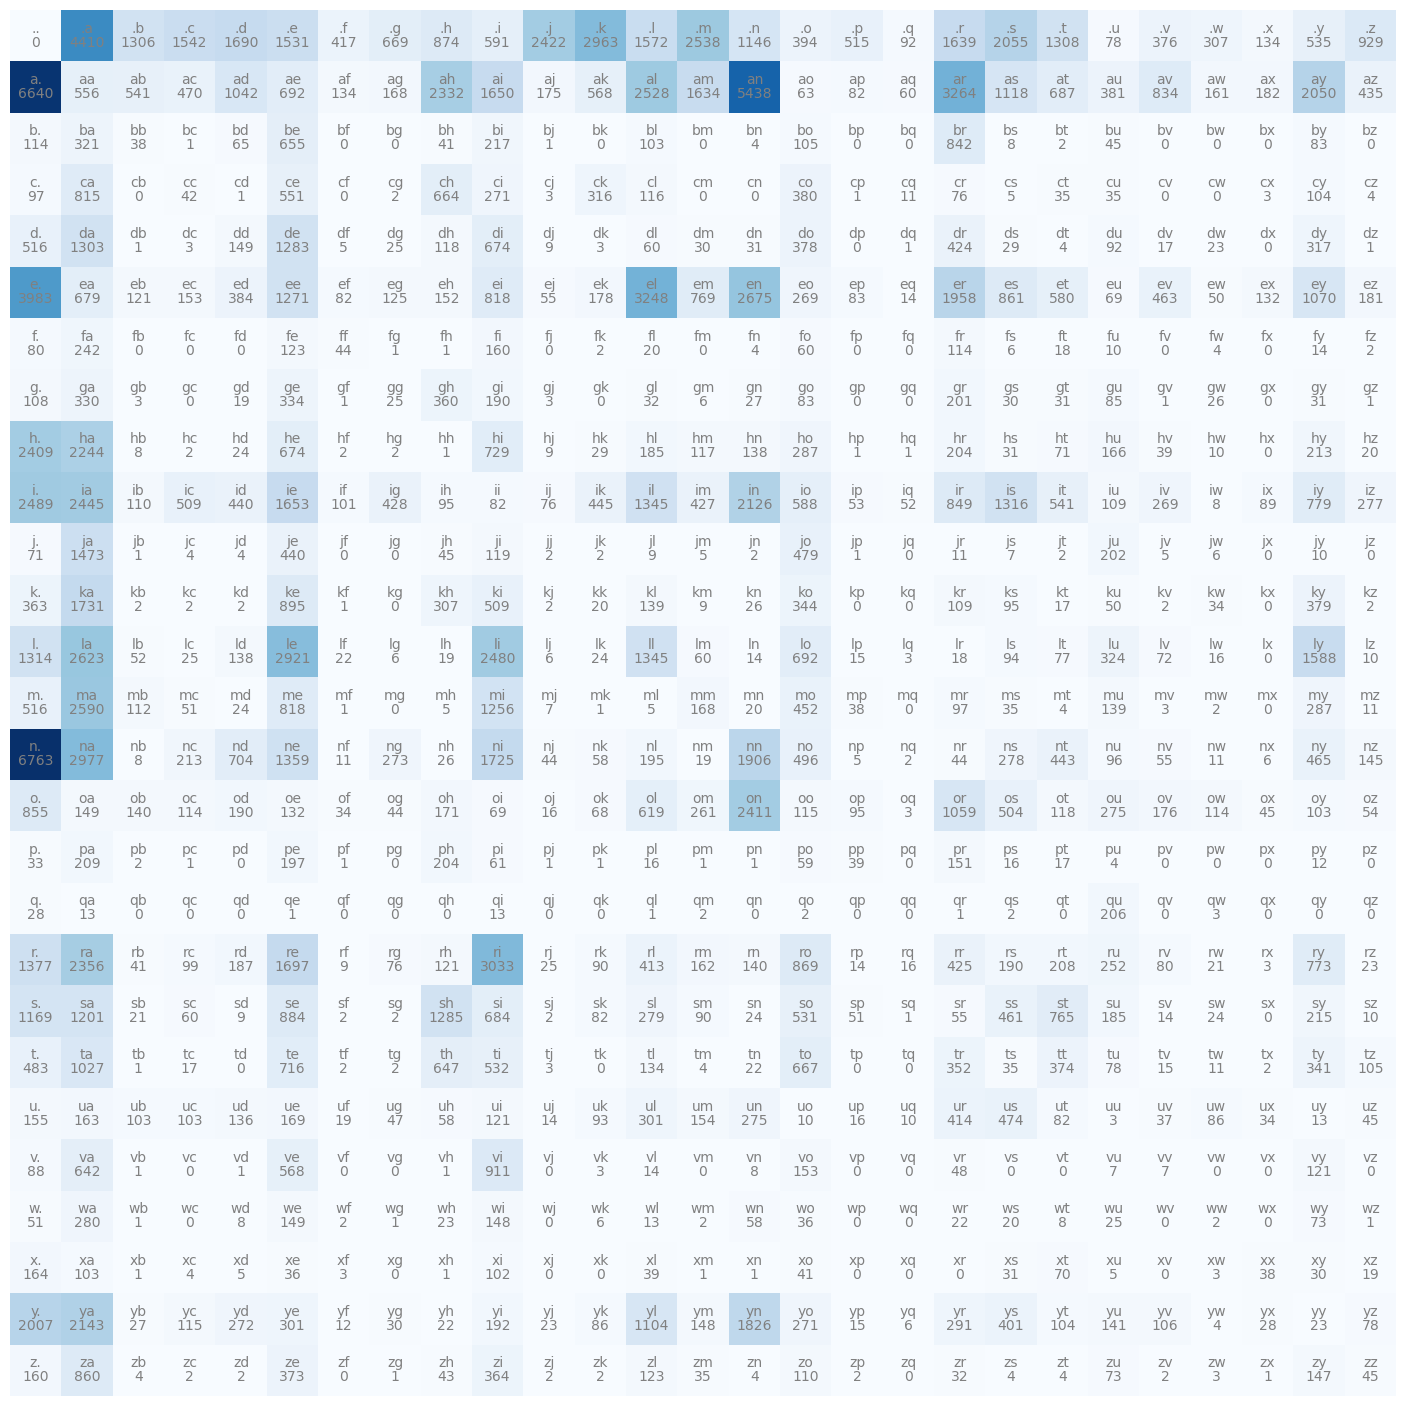

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,18))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i ,chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i ,N[i,j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [13]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [14]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, 1, replacement=True, generator=g).item()
itos[ix]

'm'

In [15]:
P = (N+1).float() ## 음의 무한대 방지를 위해 1을 더함
P = P/ P.sum(dim=1,keepdim=True)

(-0.5, 26.5, 26.5, -0.5)

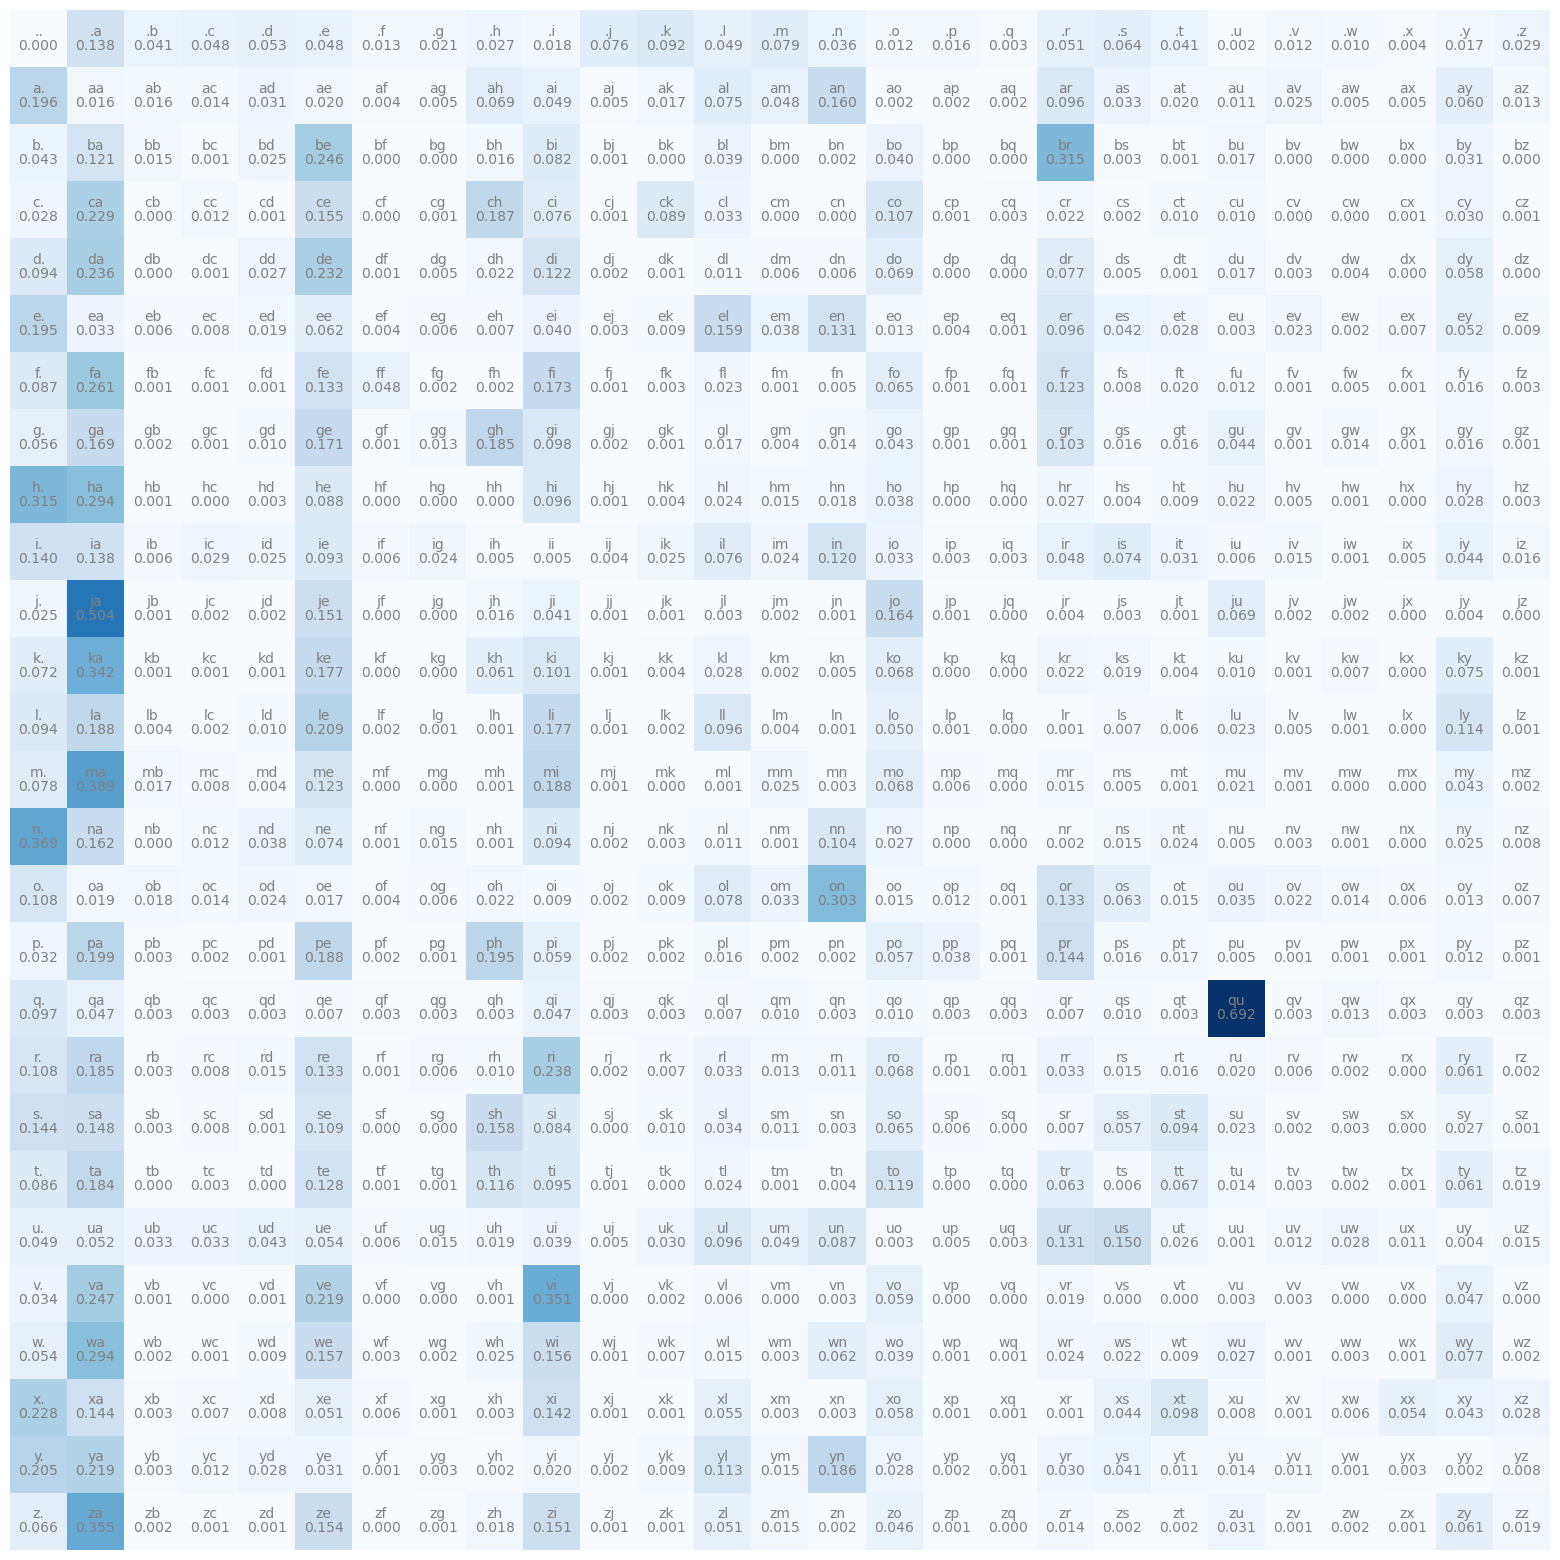

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,20))
plt.imshow(P, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i ,chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i ,'%.3f' % P[i,j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [17]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0
    while True:
        p =P[ix]
        ix = torch.multinomial(p, 1, replacement=True, generator=g).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(''.join(out))

mor
axx
minaymoryles
kondlaisah
anchshizarie
odaren
iaddash
h
jhinatien
egushl
h
br
a
jayn
ilemannariaenien
be
f
akiinela
trttanakeroruceyaaxatona
lamoynayrkiedengin


In [18]:
# GOAL : maximize likehood of the data w, r,t model parameters (staticstical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivaient to minmizing the gegative log likehood
# equivaient to minimizing the average negative log likehood


In [19]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f"{log_likelihood=}")
nll = -log_likelihood
print(f"{nll=}")
print(f"{nll/n}")

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [20]:
## create training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [21]:
xs

tensor([ 0,  5, 13, 13,  1])

In [22]:
ys

tensor([ 5, 13, 13,  1,  0])

In [23]:
import torch.nn.functional as F
g = torch.Generator().manual_seed(2147483647)
W = torch.randn(27, 27, requires_grad=True)

In [24]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W 
counts = logits.exp() 
probs = counts / counts.sum(dim=1, keepdim=True)

In [25]:
probs.shape

torch.Size([5, 27])

In [26]:
x

NameError: name 'x' is not defined

In [27]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    print('---------')
    print(f"bigram example {i+1} : {itos[x]}{itos[y]} (index {x} {y})")
    print("input ot the neural net:", x)
    print("output probablity of the neural net:",probs[i])
    print("label (actual next char):", y)
    p = probs[i, y]
    print("probability assigned by the net to the the correct charcter:", p.item())
    logp = torch.log(p)
    print("log likelihood:", logp.item())
    nll = -logp
    print("negative log likelihood:", nll.item())
    nlls[i] = nll
    
print("=======")
print("average negative log likelihood, i.e. loss =", nlls.mean().item())

---------
bigram example 1 : .e (index 0 5)
input ot the neural net: 0
output probablity of the neural net: tensor([0.0401, 0.1747, 0.0071, 0.0244, 0.0344, 0.0349, 0.0374, 0.0861, 0.0049,
        0.1121, 0.0380, 0.0188, 0.0264, 0.0071, 0.0112, 0.0294, 0.0126, 0.0095,
        0.0126, 0.0197, 0.0081, 0.0487, 0.0093, 0.1197, 0.0288, 0.0396, 0.0048],
       grad_fn=<SelectBackward0>)
label (actual next char): 5
probability assigned by the net to the the correct charcter: 0.03490949422121048
log likelihood: -3.3549964427948
negative log likelihood: 3.3549964427948
---------
bigram example 2 : em (index 5 13)
input ot the neural net: 5
output probablity of the neural net: tensor([0.0028, 0.0332, 0.0243, 0.0086, 0.0209, 0.0487, 0.0723, 0.0465, 0.2629,
        0.0210, 0.0088, 0.0110, 0.0142, 0.1042, 0.0283, 0.0399, 0.0145, 0.0050,
        0.0581, 0.0081, 0.0090, 0.0178, 0.0141, 0.0065, 0.0125, 0.0120, 0.0947],
       grad_fn=<SelectBackward0>)
label (actual next char): 13
probability assigned 

In [28]:
#---------!! OPTIMIZATION !!! yay----------

In [29]:
xs

tensor([ 0,  5, 13, 13,  1])

In [30]:
ys

tensor([ 5, 13, 13,  1,  0])

In [31]:
# randomly initialize 27 neurons for each of the 27 characters
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [32]:
# forwad pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network : one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(dim=1, keepdim=True) # probabilitites for next character
loss = -probs[torch.arange(5), ys].log().mean() # negative log likelihood

In [33]:
print(loss.item())

3.7693049907684326


In [34]:
#backward pass
W.grad = None
loss.backward()

In [35]:
W.data += -0.1 * W.grad

In [36]:
#------------------------ !! OPIMIZATION !! yay, but this time actuall------------------

In [37]:
# create the dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print("number of examples:", num)

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

number of examples: 228146


In [38]:
# gradient descent 

for k in range(10):
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(dim=1, keepdim=True)
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())
    
    W.grad = None 
    loss.backward()
    
    W.data += -0.1 * W.grad

3.758953809738159
3.758040428161621
3.7571277618408203
3.756216049194336
3.7553062438964844
3.754396915435791
3.753488779067993
3.7525815963745117
3.7516753673553467
3.7507705688476562
